In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
np.set_printoptions(suppress=True)
zero_one_colourmap = ListedColormap(('red', 'green'))
rcParams['figure.figsize'] = 14, 7
warnings.filterwarnings("ignore")
# rcParams['axes.facecolor'] = '#383838'

# Generate Data

In [ ]:
X, y = make_circles(n_samples = 1000, 
                    factor=0.85, 
                    random_state=2021, 
                    noise=0.1)

In [ ]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [ ]:
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(32, activation = inp_activation))
  model.add(Dense(32, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
def plot_performance(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper right')
  return plt.show()

# Model With Small Weights

In [12]:
model_1 = get_model("tanh")

In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,471
Trainable params: 1,471
Non-trainable params: 0
_________________________________________________________________


In [14]:
small_weight = 0.000001

In [15]:
initial_weights = model_1.get_weights()

In [16]:
initial_weights[0]

array([[-0.63877743, -0.2595585 , -0.52668774,  0.064161  , -0.30480972,
         0.47654957, -0.6302331 , -0.38143656, -0.64366984,  0.18003935],
       [-0.00312173, -0.30368337, -0.4492129 ,  0.14035982, -0.58792305,
         0.5466513 , -0.13889879,  0.02431417, -0.26729262, -0.06883001]],
      dtype=float32)

In [17]:
initial_weights[0] = small_weight * np.ones(initial_weights[0].shape)

In [18]:
initial_weights[0]

array([[0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001,
        0.000001, 0.000001, 0.000001, 0.000001],
       [0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001,
        0.000001, 0.000001, 0.000001, 0.000001]])

In [19]:
initial_weights[2] = small_weight * np.ones(initial_weights[2].shape)
initial_weights[4] = small_weight * np.ones(initial_weights[4].shape)
initial_weights[6] = small_weight * np.ones(initial_weights[6].shape)

In [20]:
model_1.set_weights(initial_weights)

In [25]:
model_1_history = model_1.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

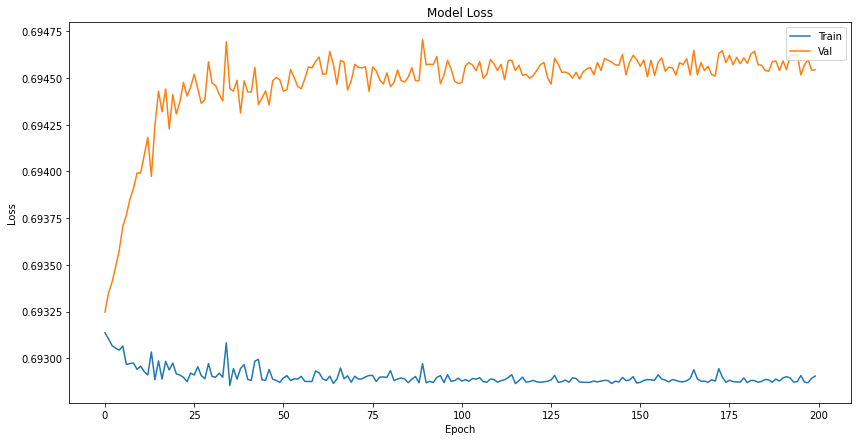

In [22]:
plot_performance(model_1_history)

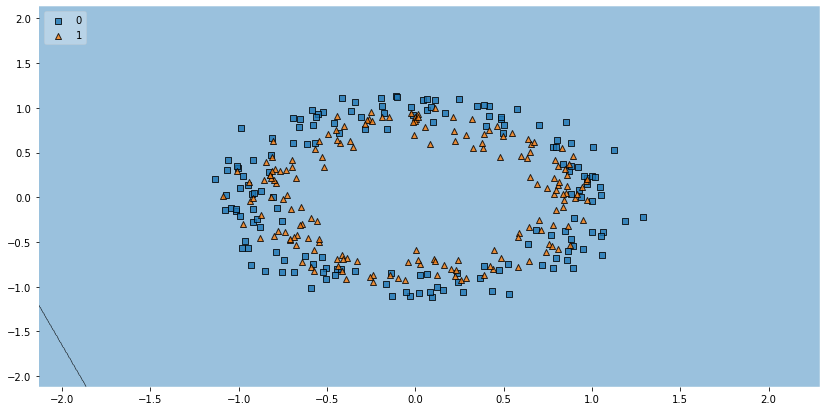

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_1, legend=2)
plt.show()

# Model With Large Weights

In [27]:
model_2 = get_model("tanh")

In [28]:
initial_weights_2 = model_2.get_weights()

In [29]:
initial_weights_2[0] = 50 * np.ones(initial_weights_2[0].shape)
initial_weights_2[2] = 50 * np.ones(initial_weights_2[2].shape)
initial_weights_2[4] = 50 * np.ones(initial_weights_2[4].shape)
initial_weights_2[6] = 50 * np.ones(initial_weights_2[6].shape)

In [30]:
model_2.set_weights(initial_weights_2)

In [31]:
model_2_history = model_2.fit(X_train, y_train, epochs = 200, 
                              validation_data = (X_test, y_test),
                              verbose=0)

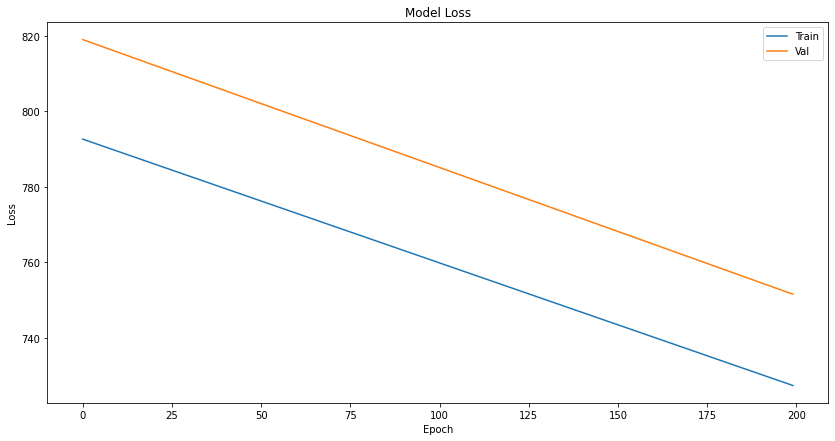

In [32]:
plot_performance(model_2_history)

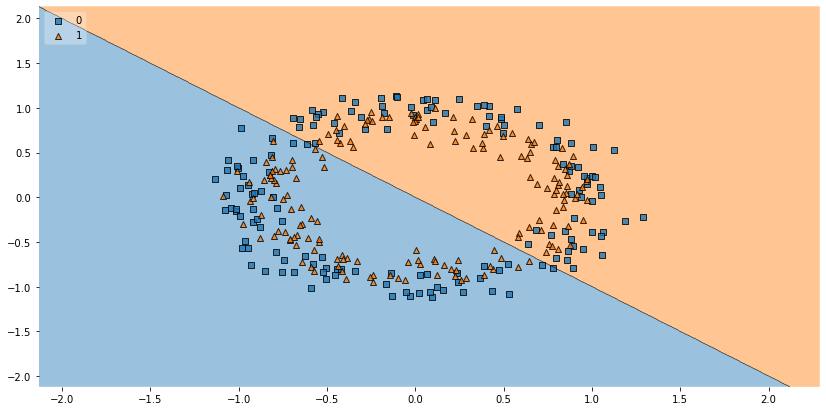

In [33]:
plot_decision_regions(X_test, y_test.ravel(), clf = model_2, legend=2)
plt.show()

# Model With Xavier Initialization

In [34]:
model = Sequential()
model.add(Dense(10,input_dim=2, activation="tanh", 
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.add(Dense(32, activation = "tanh",
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.add(Dense(32, activation = "tanh",
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.add(Dense(1, activation="sigmoid",
                kernel_initializer='glorot_normal',
                bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
xavier_weights = model.get_weights()

In [36]:
model_history = model.fit(X_train, y_train, epochs = 200, 
                          validation_data = (X_test, y_test))

Epoch 1/200
21/21 [==============================] - 0s 11ms/step - loss: 0.7031 - accuracy: 0.4597 - val_loss: 0.6930 - val_accuracy: 0.4909
Epoch 2/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.4731 - val_loss: 0.6929 - val_accuracy: 0.4788
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6953 - accuracy: 0.4970 - val_loss: 0.6948 - val_accuracy: 0.4576
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4672 - val_loss: 0.6936 - val_accuracy: 0.4424
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4896 - val_loss: 0.6925 - val_accuracy: 0.5273
Epoch 6/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6971 - accuracy: 0.4940 - val_loss: 0.6936 - val_accuracy: 0.4939
Epoch 7/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4746 - val_loss: 0.6936 - val_accuracy: 0.4182
Epoch 8/200


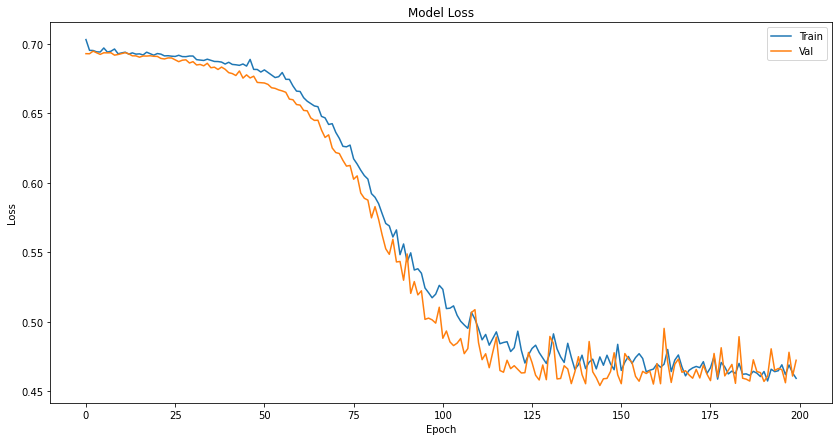

In [37]:
plot_performance(model_history)

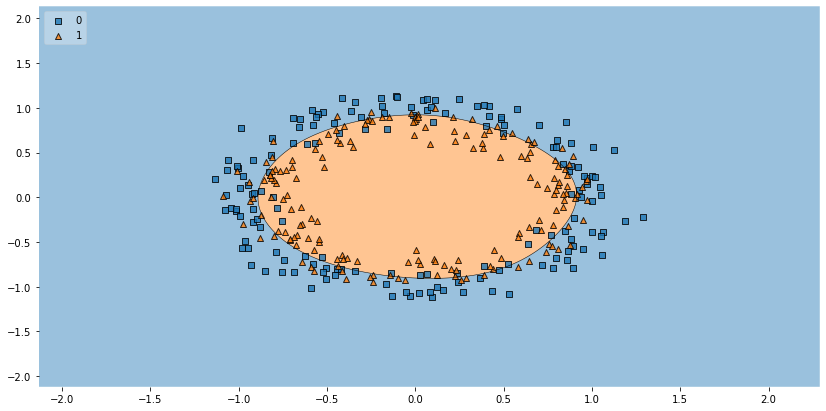

In [38]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()